## 라이브러리 가져오기

In [1]:
import numpy as np
import pandas as pd

## 데이터프레임 가공하기

In [2]:
df = pd.read_csv('./data/(노인 2011, 2014, 2017) 데이터.csv', encoding='euc-kr')
df

,특성별(1),특성별(2),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9
0,특성별(1),특성별(2),자살생각률 (%),자살시도율 (%),자살생각 이유,자살생각 이유,자살생각 이유,자살생각 이유,자살생각 이유,자살생각 이유,...,자살생각률 (%),자살시도율 (%),자살생각 이유,자살생각 이유,자살생각 이유,자살생각 이유,자살생각 이유,자살생각 이유,자살생각 이유,자살생각 이유
1,특성별(1),특성별(2),소계,소계,응답자수 (명),건강 (%),경제적 어려움 (%),외로움 (%),사망(배우자 가족 친구) (%),부부 자녀 친구 갈등 및 단절 (%),...,소계,소계,응답자수 (명),건강 (%),경제적 어려움 (%),외로움 (%),사망(배우자 가족 친구) (%),부부 자녀 친구 갈등 및 단절 (%),배우자 가족 건강 (%),기타 (%)
2,전체,소계,11.2,11.2,1181,32.6,30.8,10.2,3.6,15.6,...,6.7,13.2,673,27.6,27.7,12.4,8.3,18.6,4.9,0.6
3,지역별,동부,12.2,11.9,873,31.5,32.5,11.3,3.2,14.2,...,7.0,13.1,483,26.7,30.7,12.4,8.5,15.7,5.2,0.8
4,지역별,읍·면부,9.1,9.4,308,35.7,26.0,7.1,4.5,19.1,...,6.1,13.5,191,29.8,20.3,12.3,7.5,25.9,4.2,0.0
5,성별,남자,9.9,12.7,451,34.6,34.1,10.2,2.0,13.5,...,6.1,15.7,260,32.1,28.8,12.5,4.3,16.4,5.8,0.4
6,성별,여자,12.2,10.4,728,31.5,28.8,10.2,4.7,16.9,...,7.1,11.6,414,24.7,27.1,12.3,10.7,20.0,4.4,0.7
7,연령별,65~69세,11.1,14.8,351,32.8,31.6,7.1,3.4,16.2,...,7.5,10.0,249,29.3,29.7,12.6,6.0,18.5,3.1,0.8
8,연령별,70~74세,12.1,9.0,392,34.4,27.8,7.7,2.3,20.2,...,6.4,14.5,164,22.0,28.9,12.1,9.2,21.9,4.9,1.0
9,연령별,75~79세,11.5,11.0,274,27.0,36.9,16.1,4.0,10.6,...,6.9,17.5,147,28.1,25.7,11.6,8.0,18.1,8.5,0.0


In [3]:
# 상수 정의
YEARS = list(map(str, [2011, 2014, 2017]))

In [4]:
# df.drop([0, 1], inplace=True)
df.index = [df['특성별(1)'], df['특성별(2)']]
df.drop(columns=['특성별(1)', '특성별(2)'], inplace=True)

df_year_list = []

for year in YEARS:
    df_year = df[2:].loc[:, f'{year}':f'{year}.9'].copy()  # df.drop() 대신 df[2:] 사용
    df_year.columns = [
        [f'{year}']*10,
        [i[1] for i in list(df.iloc[0].items())][0:10],
        [i[1] for i in list(df.iloc[1].items())][0:10]
    ]
    df_year_list.append(df_year)
    
df = pd.concat(df_year_list, axis=1)

# column의 년도를 index로 옮기기
df = pd.concat([pd.concat({year: df[year]}, names=['년도']) for year in YEARS], axis=0)

df

자살생각률 (%) 자살시도율 (%)  자살생각 이유                             \
                          소계        소계 응답자수 (명) 건강 (%) 경제적 어려움 (%) 외로움 (%)   
년도   특성별(1) 특성별(2)                                                           
2011 전체     소계          11.2      11.2     1181   32.6        30.8    10.2   
     지역별    동부          12.2      11.9      873   31.5        32.5    11.3   
            읍·면부         9.1       9.4      308   35.7        26.0     7.1   
     성별     남자           9.9      12.7      451   34.6        34.1    10.2   
            여자          12.2      10.4      728   31.5        28.8    10.2   
...                      ...       ...      ...    ...         ...     ...   
2017 연가구소득별 제3오분위        6.0      11.1      120   30.4        31.4     8.7   
            제4오분위        5.1      15.1      102   30.6        24.5     9.4   
            제5오분위        4.4       3.5       89   17.7        14.6    17.6   
     기능상태별  제한없음         5.8      12.4      447   23.1        30.2    12.2   
            제한있음         9.5      14.8      226   36.3        22.9    12.8   

                                                                                
                   사망(배우자 가족 친구) (%) 부부 자녀 친구 갈등 및 단절 (%) 배우자 가족 건강 (%) 기타 (%)  
년도   특성별(1) 특성별(2)                                                              
2011 전체     소계                   3.6                 15.6           4.5    2.8  
     지역별    동부                   3.2                 14.2           4.2    3.0  
            읍·면부                 4.5                 19.1           5.2    2.2  
     성별     남자                   2.0                 13.5           2.5    3.1  
            여자                   4.7                 16.9           5.4    2.4  
...                              ...                  ...           ...    ...  
2017 연가구소득별 제3오분위                9.6                 11.9           8.2    0.0  
            제4오분위               10.9                 18.5           6.1    0.0  
            제5오분위                4.3                 36.9           6.9    1.9  
     기능상태별  제한없음                 7.5                 20.5           6.2    0.2  
            제한있음                 9.7                 14.7           2.4    1.2  

[96 rows x 10 columns]

In [5]:
df[(df == '-').any(axis=1)]

자살생각률 (%) 자살시도율 (%)  자살생각 이유                             \
                          소계        소계 응답자수 (명) 건강 (%) 경제적 어려움 (%) 외로움 (%)   
년도   특성별(1) 특성별(2)                                                           
2011 교육수준별  중학교            -         -        -      -           -       -   
            고등학교           -         -        -      -           -       -   
2014 교육수준별  중·고등학교         -         -        -      -           -       -   
2017 교육수준별  중·고등학교         -         -        -      -           -       -   

                                                                                
                   사망(배우자 가족 친구) (%) 부부 자녀 친구 갈등 및 단절 (%) 배우자 가족 건강 (%) 기타 (%)  
년도   특성별(1) 특성별(2)                                                              
2011 교육수준별  중학교                    -                    -             -      -  
            고등학교                   -                    -             -      -  
2014 교육수준별  중·고등학교                 -                    -             -      -  
2017 교육수준별  중·고등학교                 -                    -             -      -

In [6]:
(df == '0').any()

자살생각률 (%)  소계                      False
자살시도율 (%)  소계                      False
자살생각 이유    응답자수 (명)                False
           건강 (%)                  False
           경제적 어려움 (%)             False
           외로움 (%)                 False
           사망(배우자 가족 친구) (%)       False
           부부 자녀 친구 갈등 및 단절 (%)    False
           배우자 가족 건강 (%)           False
           기타 (%)                  False
dtype: bool

In [7]:
df = df.replace('-', 0).apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 96 entries, ('2011', '전체', '소계') to ('2017', '기능상태별', '제한있음')
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   (자살생각률 (%), 소계)                  96 non-null     float64
 1   (자살시도율 (%), 소계)                  96 non-null     float64
 2   (자살생각 이유, 응답자수 (명))              96 non-null     int64  
 3   (자살생각 이유, 건강 (%))                96 non-null     float64
 4   (자살생각 이유, 경제적 어려움 (%))           96 non-null     float64
 5   (자살생각 이유, 외로움 (%))               96 non-null     float64
 6   (자살생각 이유, 사망(배우자 가족 친구) (%))     96 non-null     float64
 7   (자살생각 이유, 부부 자녀 친구 갈등 및 단절 (%))  96 non-null     float64
 8   (자살생각 이유, 배우자 가족 건강 (%))         96 non-null     float64
 9   (자살생각 이유, 기타 (%))                96 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 9.8+ KB


In [8]:
df.columns

MultiIndex([('자살생각률 (%)',                   '소계'),
            ('자살시도율 (%)',                   '소계'),
            (  '자살생각 이유',             '응답자수 (명)'),
            (  '자살생각 이유',               '건강 (%)'),
            (  '자살생각 이유',          '경제적 어려움 (%)'),
            (  '자살생각 이유',              '외로움 (%)'),
            (  '자살생각 이유',    '사망(배우자 가족 친구) (%)'),
            (  '자살생각 이유', '부부 자녀 친구 갈등 및 단절 (%)'),
            (  '자살생각 이유',        '배우자 가족 건강 (%)'),
            (  '자살생각 이유',               '기타 (%)')],
           )

## 데이터 분석하기

### 남/여 시도율

In [9]:
df_gender = pd.DataFrame([
    [df.loc[year, '성별', '남자'].loc['자살시도율 (%)', '소계'],
     df.loc[year, '성별', '여자'].loc['자살시도율 (%)', '소계']]
    for year in YEARS], index=YEARS, columns=['남자', '여자'])
df_gender

,남자,여자
2011,12.7,10.4
2014,10.1,13.9
2017,15.7,11.6


### 연령별 시도율

In [10]:
df_age = pd.DataFrame([
    [df.loc[year, '연령별', '65~69세'].loc['자살시도율 (%)', '소계'],
     df.loc[year, '연령별', '70~74세'].loc['자살시도율 (%)', '소계'],
     df.loc[year, '연령별', '75~79세'].loc['자살시도율 (%)', '소계'],
     df.loc[year, '연령별', '80~84세'].loc['자살시도율 (%)', '소계'],
     df.loc[year, '연령별', '85세 이상'].loc['자살시도율 (%)', '소계'],]
    for year in YEARS], index=YEARS, columns=['65~69세', '70~74세', '75~79세', '80~84세', '85세 이상'])
df_age

,65~69세,70~74세,75~79세,80~84세,85세 이상
2011,14.8,9.0,11.0,11.0,6.7
2014,11.9,15.2,11.9,13.1,3.7
2017,10.0,14.5,17.5,17.2,2.3


### 결혼상태별 시도율

In [11]:
df_marriage = pd.DataFrame([
    [df.loc[year, '결혼상태별', '배우자 있음'].loc['자살시도율 (%)', '소계'],
     df.loc[year, '결혼상태별', '배우자 없음'].loc['자살시도율 (%)', '소계'],]
    for year in YEARS], index=YEARS, columns=['배우자 있음', '배우자 없음'])
df_marriage

,배우자 있음,배우자 없음
2011,10.3,12.7
2014,11.9,13.0
2017,13.6,12.8


### 가구형태별 시도율

In [12]:
df_family = pd.DataFrame([
     [df.loc[year, '가구형태별', '노인독거'].loc['자살시도율 (%)', '소계'],
      df.loc[year, '가구형태별', '노인부부'].loc['자살시도율 (%)', '소계'],
      df.loc[year, '가구형태별', '자녀동거'].loc['자살시도율 (%)', '소계'],
     df.loc[year, '가구형태별', '기타'].loc['자살시도율 (%)', '소계'],]
    for year in YEARS], index=YEARS, columns=['노인독거', '노인부부', '자녀동거', '기타'])
df_family

,노인독거,노인부부,자녀동거,기타
2011,11.8,10.6,11.3,12.3
2014,12.7,12.3,11.1,20.8
2017,15.4,13.9,8.5,10.5


### 이유별 시도율

In [13]:
df_reason = pd.DataFrame([
    [df.loc[year, '전체', '소계'].loc['자살생각 이유', '건강 (%)'],
     df.loc[year, '전체', '소계'].loc['자살생각 이유', '경제적 어려움 (%)'],
     df.loc[year, '전체', '소계'].loc['자살생각 이유', '외로움 (%)'],
     df.loc[year, '전체', '소계'].loc['자살생각 이유', '사망(배우자 가족 친구) (%)'],
     df.loc[year, '전체', '소계'].loc['자살생각 이유', '부부 자녀 친구 갈등 및 단절 (%)'],
     df.loc[year, '전체', '소계'].loc['자살생각 이유', '배우자 가족 건강 (%)'],
     df.loc[year, '전체', '소계'].loc['자살생각 이유', '기타 (%)'],
    ]
    for year in YEARS], index=YEARS, columns=['건강 (%)', '경제적 어려움 (%)', '외로움 (%)', '사망(배우자 가족 친구) (%)', '부부 자녀 친구 갈등 및 단절 (%)', '배우자 가족 건강 (%)', '기타 (%)'])
df_reason

,건강 (%),경제적 어려움 (%),외로움 (%),사망(배우자 가족 친구) (%),부부 자녀 친구 갈등 및 단절 (%),배우자 가족 건강 (%),기타 (%)
2011,32.6,30.8,10.2,3.6,15.6,4.5,2.8
2014,24.4,40.4,13.3,5.4,11.5,4.8,0.2
2017,27.6,27.7,12.4,8.3,18.6,4.9,0.6


## 시각화

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
plt.rcParams['font.family'] = 'NanumGothic'

In [16]:
df_gender_index = df_gender.index
df_gender = df_gender.melt(var_name='성별', value_name='시도율 (%)')
df_gender['년도'] = df_gender_index.to_list()*2
df_gender

,성별,시도율 (%),년도
0,남자,12.7,2011
1,남자,10.1,2014
2,남자,15.7,2017
3,여자,10.4,2011
4,여자,13.9,2014
5,여자,11.6,2017


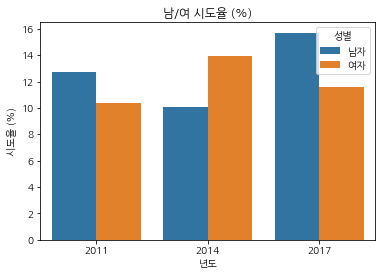

In [17]:
plt.title('남/여 시도율 (%)')
sns.barplot(x='년도', y='시도율 (%)', hue='성별', data=df_gender)
plt.show()

In [18]:
df_age_index = df_age.index
df_age = df_age.melt(var_name='연령별', value_name='시도율 (%)')
df_age['년도'] = df_age_index.to_list()*5
df_age

,연령별,시도율 (%),년도
0,65~69세,14.8,2011
1,65~69세,11.9,2014
2,65~69세,10.0,2017
3,70~74세,9.0,2011
4,70~74세,15.2,2014
5,70~74세,14.5,2017
6,75~79세,11.0,2011
7,75~79세,11.9,2014
8,75~79세,17.5,2017
9,80~84세,11.0,2011


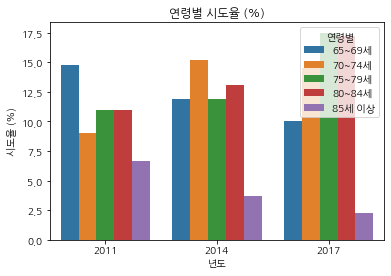

In [19]:
plt.title('연령별 시도율 (%)')
sns.barplot(x='년도', y='시도율 (%)', hue='연령별', data=df_age)
plt.show()

In [20]:
df_marriage_index = df_marriage.index
df_marriage = df_marriage.melt(var_name='결혼상태별', value_name='시도율 (%)')
df_marriage['년도'] = df_marriage_index.to_list()*2
df_marriage

,결혼상태별,시도율 (%),년도
0,배우자 있음,10.3,2011
1,배우자 있음,11.9,2014
2,배우자 있음,13.6,2017
3,배우자 없음,12.7,2011
4,배우자 없음,13.0,2014
5,배우자 없음,12.8,2017


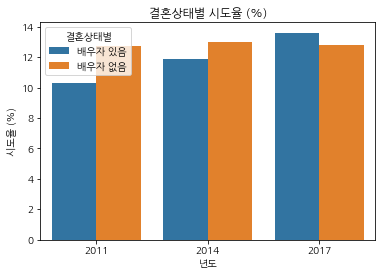

In [21]:
plt.title('결혼상태별 시도율 (%)')
sns.barplot(x='년도', y='시도율 (%)', hue='결혼상태별', data=df_marriage)
plt.show()

In [22]:
df_family_index = df_family.index
df_family = df_family.melt(var_name='가구형태별', value_name='시도율 (%)')
df_family['년도'] = df_family_index.to_list()*4
df_family

,가구형태별,시도율 (%),년도
0,노인독거,11.8,2011
1,노인독거,12.7,2014
2,노인독거,15.4,2017
3,노인부부,10.6,2011
4,노인부부,12.3,2014
5,노인부부,13.9,2017
6,자녀동거,11.3,2011
7,자녀동거,11.1,2014
8,자녀동거,8.5,2017
9,기타,12.3,2011


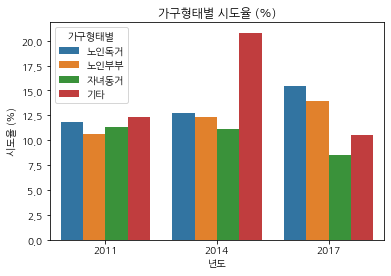

In [23]:
plt.title('가구형태별 시도율 (%)')
sns.barplot(x='년도', y='시도율 (%)', hue='가구형태별', data=df_family)
plt.show()

In [24]:
df_reason_index = df_reason.index
df_reason = df_reason.melt(var_name='자살생각 이유', value_name='시도율 (%)')
df_reason['년도'] = df_reason_index.to_list()*7
df_reason

,자살생각 이유,시도율 (%),년도
0,건강 (%),32.6,2011
1,건강 (%),24.4,2014
2,건강 (%),27.6,2017
3,경제적 어려움 (%),30.8,2011
4,경제적 어려움 (%),40.4,2014
5,경제적 어려움 (%),27.7,2017
6,외로움 (%),10.2,2011
7,외로움 (%),13.3,2014
8,외로움 (%),12.4,2017
9,사망(배우자 가족 친구) (%),3.6,2011


In [28]:
plt.rcParams['figure.figsize'] = 14, 8

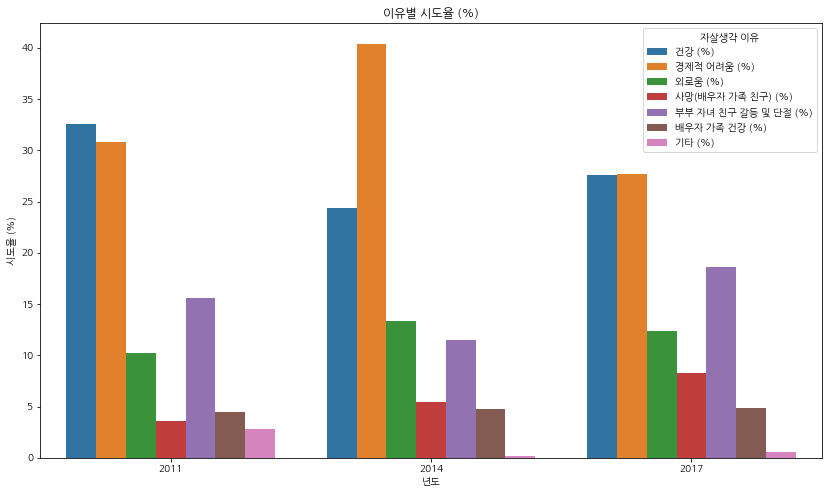

In [29]:
plt.title('이유별 시도율 (%)')
sns.barplot(x='년도', y='시도율 (%)', hue='자살생각 이유', data=df_reason)
plt.show()